# 1. Data Gathering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Gathering data from the Kaggle csv file
df= pd.read_csv(r'C:\Users\srini\Downloads\6294_9223_bundle_archive\MiningProcess_Flotation_Plant_Database.csv')
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


# 2. Data Wrangling

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
date                            737453 non-null object
% Iron Feed                     737453 non-null object
% Silica Feed                   737453 non-null object
Starch Flow                     737453 non-null object
Amina Flow                      737453 non-null object
Ore Pulp Flow                   737453 non-null object
Ore Pulp pH                     737453 non-null object
Ore Pulp Density                737453 non-null object
Flotation Column 01 Air Flow    737453 non-null object
Flotation Column 02 Air Flow    737453 non-null object
Flotation Column 03 Air Flow    737453 non-null object
Flotation Column 04 Air Flow    737453 non-null object
Flotation Column 05 Air Flow    737453 non-null object
Flotation Column 06 Air Flow    737453 non-null object
Flotation Column 07 Air Flow    737453 non-null object
Flotation Column 01 Level       737453 non-null object
Flotation

From this info column we can see that there are no missing values in the data as all columns have 737453 entries. However, the datatype for all the columns is a string. This needs to changed.

In [4]:
# Getting a summary of the columns
df.describe()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453,737453,737453,737453,737453,737453,737453,737453,737453,737453,...,737453,737453,737453,737453,737453,737453,737453,737453,737453,737453
unique,4097,278,293,409317,319416,180189,131143,105805,43675,80442,...,86819,299573,331189,322315,309264,276051,301502,295667,38696,55569
top,2017-07-21 13:00:00,"64,03","6,26","2562,5","534,668","402,246","10,0591","1,75","299,927","255,322",...,"299,487","452,441","608,887","601,06","491,406","513,879","474,37","479,478","65,44","2,08"
freq,180,142560,142560,690,959,1735,1509,3214,13683,1487,...,3405,1013,817,989,733,709,746,905,16920,17100


### Time stamp
The timestamps only have the data for that hour, we need to modify them to have time for mintues and seconds when the reading was taken.

In [5]:
# Finding the number of readings in a given hour
df.date.value_counts()

2017-07-21 13:00:00    180
2017-05-29 20:00:00    180
2017-03-14 17:00:00    180
2017-09-07 00:00:00    180
2017-08-11 12:00:00    180
                      ... 
2017-04-13 12:00:00    180
2017-05-02 11:00:00    180
2017-04-12 06:00:00    180
2017-04-10 00:00:00    179
2017-03-10 01:00:00    174
Name: date, Length: 4097, dtype: int64

Since there are a total of 180 readings for each hour, we can make an assumption that the time has been split uniformly and each row reading has been taken after 20 seconds (3600 seconds/ 180). This assumption will help us to better analyze the time series data. <br>

Moreover, this data is in string format and needs to be changed to datetime.

In [6]:
#changing the format to datetime
df.loc[:,'date']= pd.to_datetime(df.date)

In [7]:
df.date.max()- df.date.min()

Timedelta('183 days 22:00:00')

Since there are 183 days and 2200 hrs between min and max time. Hence there should be 4414 hours in the readings. However, there are only 4097 unique hours. Hence, some hours are missing and we cannot directly add 20 seconds to previous timestamp to create the next timestamp.

In [8]:
unique_time= df.date.unique()

# creaating a series with values that increent in 20 seconds
add_time= pd.Series([pd.Timedelta(x,unit='s') for x in np.arange(0,20*180,20)])

#for first hour which has 174 readings we need 
add_time_1= pd.Series([pd.Timedelta(x,unit='s') for x in np.arange(0,20*174,20)])

In [9]:
# Adding 20 sec to every reading from the previous reading to get readings on an hourly basis
temp_series= pd.Series()

for i,ut in enumerate(unique_time):
    if i==0:
        temp = ut + add_time_1
    else:
        temp = ut + add_time
    
    #Appending all the series
    temp_series = temp_series.append(temp, ignore_index= True )

In [10]:
# joining the 20 second interval date to the df column
df.loc[:,'date2']= temp_series[:737453]
df.head(2)

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,date2
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31",2017-03-10 01:00:00
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31",2017-03-10 01:00:20


In [35]:
# Checking to see if there is a discrepency between date and date2 columns
sum(~df.date2.dt.hour== df.date.dt.hour)

0

### Changing datatype for columns
We need to change the strings into float values by replacing the ',' to decimal value.

In [18]:
# changing the datatype for all columns except date
for col in df.columns[1:24]:
    df.loc[:,col]=df[col].str.replace(',','.').astype(float)

In [40]:
df.head(3)

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,date2
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31,2017-03-10 01:00:00
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31,2017-03-10 01:00:20
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31,2017-03-10 01:00:40


Since all the data columns have been changed to float our transformation has been successful.

### Aggregating the data on hourly basis

In [50]:
# Creating another dataframe with average hourly readings
df2 = df.groupby(by='date').mean()
df2.head(2)

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.2,16.98,3162.625026,578.786678,398.753368,10.113487,1.729558,251.166672,250.226086,250.178287,...,250.208184,450.383776,446.891845,450.474523,449.912259,455.792161,464.383310,450.532747,66.91,1.31
2017-03-10 02:00:00,55.2,16.98,3133.256389,537.219661,399.871822,10.129742,1.667784,249.880589,250.214050,250.033317,...,249.897572,449.373361,450.249356,450.081222,450.328806,448.722983,455.501528,451.387700,67.06,1.11


In [53]:
# Understanding how much the readings change for each column in a given hour
df.groupby(by='date').std().mean()

% Iron Feed                       0.000000
% Silica Feed                     0.000000
Starch Flow                     634.606148
Amina Flow                       28.399694
Ore Pulp Flow                     4.252541
Ore Pulp pH                       0.067562
Ore Pulp Density                  0.020701
Flotation Column 01 Air Flow      1.346197
Flotation Column 02 Air Flow      4.966327
Flotation Column 03 Air Flow      1.743913
Flotation Column 04 Air Flow      0.664893
Flotation Column 05 Air Flow      1.133899
Flotation Column 06 Air Flow      4.433625
Flotation Column 07 Air Flow      4.853339
Flotation Column 01 Level        27.102026
Flotation Column 02 Level        33.442668
Flotation Column 03 Level        32.923495
Flotation Column 04 Level        40.306033
Flotation Column 05 Level        29.727799
Flotation Column 06 Level        37.400396
Flotation Column 07 Level        36.822797
% Iron Concentrate                0.004903
% Silica Concentrate              0.006918
dtype: floa

In order to get a better understanding of the variation we need to see it as a ratio of the mean for each column.

In [56]:
(df.groupby(by='date').std().mean()/ df.groupby(by='date').mean().mean())*100

% Iron Feed                      0.000000
% Silica Feed                    0.000000
Starch Flow                     22.118325
Amina Flow                       5.817877
Ore Pulp Flow                    1.069611
Ore Pulp pH                      0.691696
Ore Pulp Density                 1.231940
Flotation Column 01 Air Flow     0.480524
Flotation Column 02 Air Flow     1.791865
Flotation Column 03 Air Flow     0.620428
Flotation Column 04 Air Flow     0.222040
Flotation Column 05 Air Flow     0.378070
Flotation Column 06 Air Flow     1.517995
Flotation Column 07 Air Flow     1.669222
Flotation Column 01 Level        5.209480
Flotation Column 02 Level        6.398685
Flotation Column 03 Level        6.196173
Flotation Column 04 Level        9.589340
Flotation Column 05 Level        6.990631
Flotation Column 06 Level        8.698954
Flotation Column 07 Level        8.746061
% Iron Concentrate               0.007537
% Silica Concentrate             0.297303
dtype: float64

So % Iron feed and % silicon feed are measured on an hourly basis. Similarly ore pulp pH and ore pulp density shows that it has very little variation within an hour. <br>

However, starch flow varies by about 22% in a given hour. Similarly the amina reading varies by almost 5.8% in an hour. <br>
For floatation column level, the variation is between 5-10% in any given hour.

The question now arises if taking an hourly average to predict the output is appropriate as we would lose information within an hour.

# 3. Exploratory Data Analysis

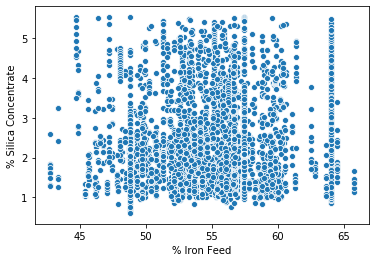

In [47]:
# Finding the relationship between the % Iron Feed and the % Silica Concentrate
sns.scatterplot(x=df2['% Iron Feed'], y=df2['% Silica Concentrate'],ci=None )
plt.show()

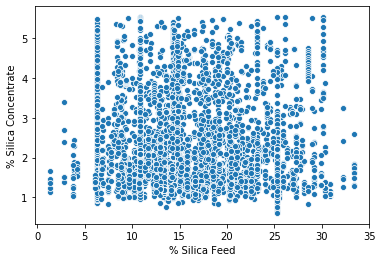

In [48]:
# Finding the relationship between the % Iron Feed and the % Silica Concentrate
sns.scatterplot(x=df2['% Silica Feed'], y=df2['% Silica Concentrate'],ci=0 )
plt.show()

There does not seem to be a definite realtionship between the iron and silica feed and the % silica concentrate.

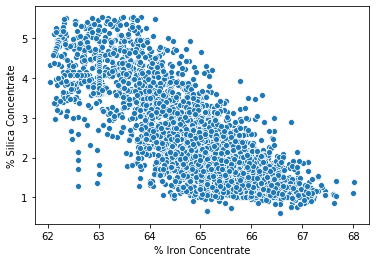

In [49]:
# Finding the relationship between the % Iron Feed and the % Silica Concentrate
sns.scatterplot(x=df2['% Iron Concentrate'], y=df2['% Silica Concentrate'],ci=0 )
plt.show()

There is a clearn negative correlation between teh % silica concentrate and the % iron concentrate which the author of the dataset has already mentioned happens. However, the goal is to predict the % silica concentrate without the iron concentrate measurements.